In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap




In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


     0           1
0 -5.0  123.867799
1 -4.9   63.138296
2 -4.8    4.163196
3 -4.7   -0.163918
4 -4.6  -33.727488


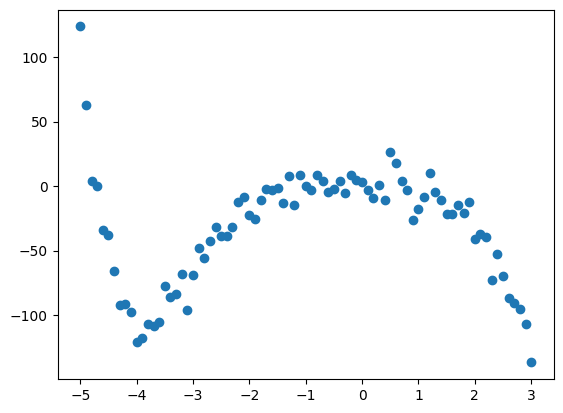

In [4]:
data1 = pd.read_csv("/content/drive/MyDrive/w3regr.csv", header = None)

print(data1.head())

plt.scatter(data1[0], data1[1])
plt.show()


          0         1  2
0  0.475861  0.541139  0
1  1.412233 -1.540877  0
2  0.022608 -0.203143  0
3 -0.047869 -0.499965  0
4  1.701335  0.383024  0


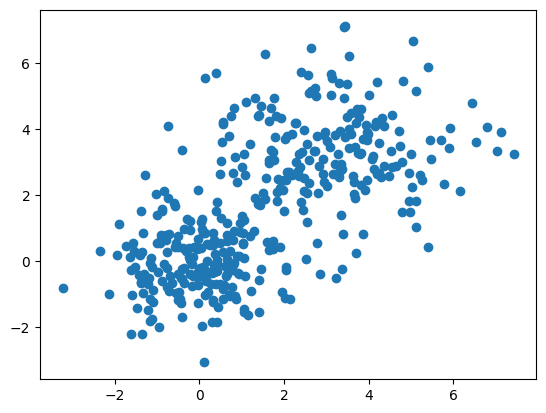

In [5]:
data2 = pd.read_csv("/content/drive/MyDrive/w3classif.csv", header = None)
print(data2.head())

plt.scatter(data2[0], data2[1])
plt.show()

Q2: Shuffle both datasets into 70% train and 30% test

In [6]:




X_classif = data2[[0, 1]]
y_classif = data2[2]
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_classif, y_classif, test_size=0.3, random_state=42) #w3classif


Q3: knn classifier with k=3 for w3classif.csv

(a) Build a k-NN classifier with k = 3 for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate).

(b) Plot the decision regions for your classifier together with the training and/or test data points.

(c) Experiment with different k values and see how it affects the loss values and the
decision regions

Test Accuracy: 0.9833333333333333
Training Accuracy: 0.9607142857142857
Training Misclassification Rate: 1.6667%
Testing Misclassification Rate: 3.9286%


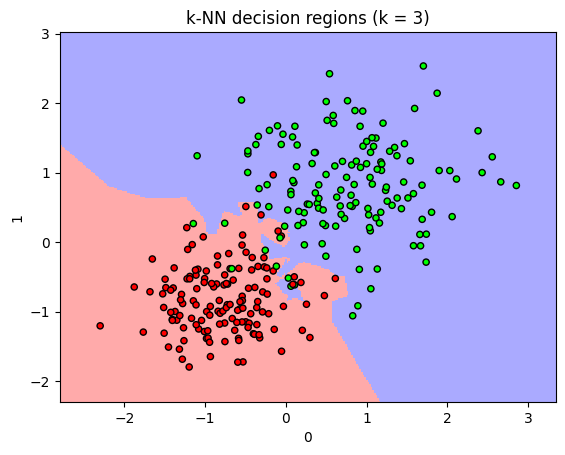

In [21]:
# pre define k so its easy to change

kval = 3
# for knn you have to normalise before training model bc of the dist calculation
scaler = StandardScaler()
X_train_df2 = scaler.fit_transform(X_train_df2)
X_test_df2 = scaler.transform(X_test_df2)

# build knn classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=kval)
knn.fit(X_train_df2, y_train_df2)

# accuracy score for test data
y_pred_df2 = knn.predict(X_test_df2)
accuracy_test = accuracy_score(y_test_df2, y_pred_df2)
print("Test Accuracy:", accuracy_test)

# accuracy score for training data
y_pred_train_df2 = knn.predict(X_train_df2)
accuracy_train = accuracy_score(y_train_df2, y_pred_train_df2)
print("Training Accuracy:", accuracy_train)

#training loss is 1 - accuracy
train_loss = 1 - accuracy_test
test_loss = 1 - accuracy_train

# Print results as %
print(f"Training Misclassification Rate: {train_loss * 100:.4f}%")
print(f"Testing Misclassification Rate: {test_loss * 100:.4f}%")


def plot_decision_regions(X_train, y_train, model, feature_names, k=kval):
    # feature columns
    X1_train = X_train[:, 0]  # 0 for feature 1
    X2_train = X_train[:, 1]  # 1 for feature 2

    # meshgrid of points to cover the feature space
    h = 0.02
    x_min, x_max = X1_train.min() - 0.5, X1_train.max() + 0.5
    y_min, y_max = X2_train.min() - 0.5, X2_train.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # class labels for the points in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # plot the training data points
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    plt.scatter(X1_train, X2_train, c=y_train, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'k-NN decision regions (k = {kval})')
    plt.show()

feature_names = [0,1]
plot_decision_regions(X_train_df2, y_train_df2, knn, feature_names, k=kval)

# decision region

"""

as k is increased, decision region becomes smoother (underfitted)
if k < 3, decision regions become more complex (overfitted)


"""




Q4: knn regression model, k = 3

Training SSE: 6222.444757937379
Testing SSE: 13820.78366886755


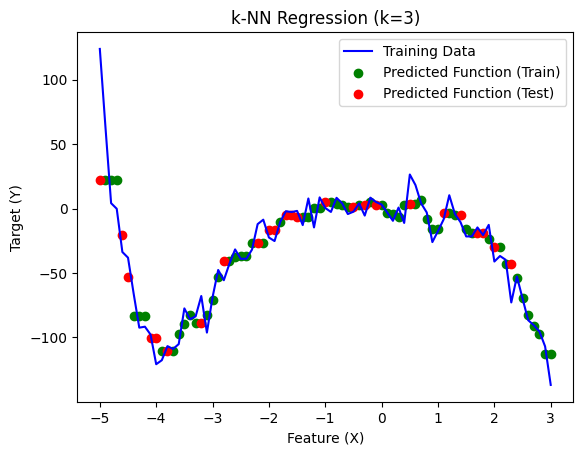

In [49]:


kval1 = 3 #k value

X = data1.drop(columns=[1])
Y = data1[1]
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X,Y, test_size=0.3, random_state=42) # w3regr


# build regressor
knn2 = KNeighborsRegressor(n_neighbors=kval1)
knn2.fit(X_train_df1, y_train_df1)

y_train_pred_df1 = knn2.predict(X_train_df1)
y_test_pred_df1 = knn2.predict(X_test_df1)

train_sse = np.sum((y_train_df1 - y_train_pred_df1)**2)
test_sse = np.sum((y_test_df1 - y_test_pred_df1)**2)

print(f'Training SSE: {train_sse}')
print(f'Testing SSE: {test_sse}')


fig, ax = plt.subplots()

# plot training data
ax.plot(X, Y, label='Training Data', color='blue')

ax.scatter(X_train_df1, y_train_pred_df1, c='g', label='Predicted Function (Train)')
ax.scatter(X_test_df1, y_test_pred_df1, c='r', label='Predicted Function (Test)')

plt.legend()
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title(f'k-NN Regression (k={kval1})')

plt.show()
